## 第6章 音データの加工・可視化を行う10本ノック

### ノック71 : 音データを再生してみよう

### ノック72 : 音データを読み込んでみよう

In [4]:
import librosa

audio1, sr1 = librosa.load('../data/音声.mp3', sr=None)

display(audio1)
display(sr1)

Note: Illegal Audio-MPEG-Header 0x00000000 at offset 82392.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


array([ 0.        ,  0.        ,  0.        , ..., -0.00418601,
       -0.00416326, -0.00401785], dtype=float32)

44100

#### データ形状の確認

In [5]:
display(audio1.shape)
display(audio1.max())
display(audio1.min())

(46080,)

0.7146811

-0.5591311

#### 電話着信音データの読み込み

In [6]:
audio2, sr2 = librosa.load('../data/携帯電話着信音.mp3', sr=None)

display(audio2)
display(sr2)
display(audio2.shape)

Note: Illegal Audio-MPEG-Header 0x00000000 at offset 102454.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


array([ 0.        ,  0.        ,  0.        , ..., -0.00509245,
       -0.00407731, -0.00323255], dtype=float32)

44100

(101376,)

### ノック73 : 音データの一部を取得してみよう

#### 電話着信音データ 1秒間のみ読み込み

In [7]:
audio2, sr2 = librosa.load('../data/携帯電話着信音.mp3', sr=None, offset=0, duration=1)

display(audio2)
display(sr2)
display(audio2.shape)

array([0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 8.899410e-05,
       7.230077e-04, 1.794572e-03], dtype=float32)

44100

(44100,)

#### 音声データ 1秒間のみ読み込み

In [10]:
audio1, sr1 = librosa.load('../data/音声.mp3', sr=None, offset=0, duration=1)

display(audio1)
display(sr1)
display(audio1.shape)

array([0.        , 0.        , 0.        , ..., 0.0020243 , 0.00252705,
       0.00249644], dtype=float32)

44100

(44100,)

### ノック74 : 音データのサンプリングレートを変えてみよう

#### 22050Hzでのデータ読み込み

In [12]:
audio1_sr22, sr1_sr22 = librosa.load('../data/音声.mp3', sr=22050, offset=0, duration=1)

display(audio1_sr22)
display(sr1_sr22)
display(audio1_sr22.shape)

array([ 3.9968029e-15, -7.2164497e-16,  3.4972025e-15, ...,
        2.2931169e-03,  1.9602901e-03,  2.4683487e-03], dtype=float32)

22050

(22050,)

#### 8000Hz サンプリングレートデータの作成

In [15]:
audio1_sr8 = librosa.resample(audio1, orig_sr=sr1, target_sr=8000)

display(audio1_sr8)
display(audio1_sr8.shape)

array([ 2.8813294e-11, -3.3218730e-11,  1.5574182e-10, ...,
        2.2176569e-03,  2.0332162e-03,  2.3386339e-03], dtype=float32)

(8000,)

#### サンプリングレートの取得

In [16]:
librosa.get_samplerate('../data/音声.mp3')

44100

### ノック75 : 音データを可視化してみよう

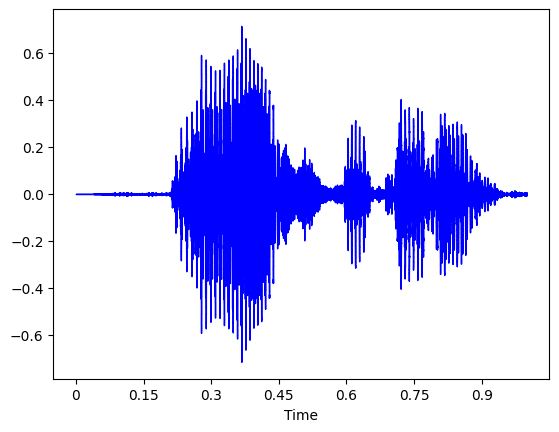

In [21]:
import librosa.display as libdisp

libdisp.waveshow(audio1, sr=sr1, color="blue")

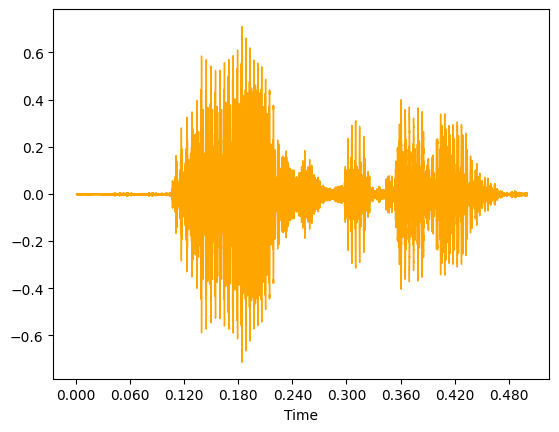

In [22]:
libdisp.waveshow(audio1_sr22, sr=sr1, color="orange")

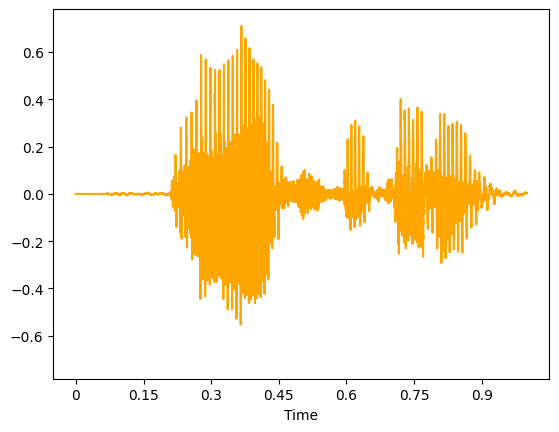

In [23]:
libdisp.waveshow(audio1_sr8, sr=8000, color="orange")

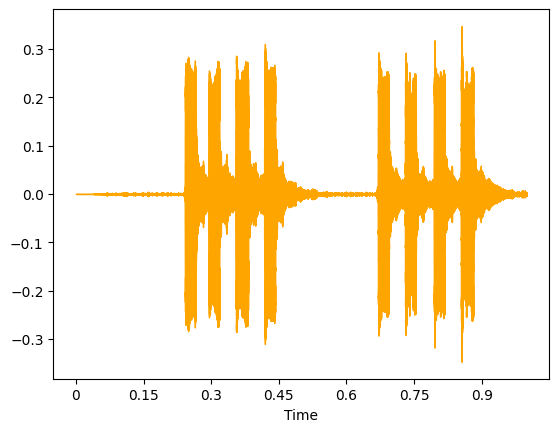

In [25]:
libdisp.waveshow(audio2, sr=sr2, color="orange")

### ノック76 : 音データの大きさを取得してみよう

#### データ全体に対してのRMS

In [27]:
import numpy as np

audio1_rms = np.sqrt(np.mean(audio1 ** 2))
audio2_rms = np.sqrt(np.mean(audio2 ** 2))

display(audio1_rms)
display(audio2_rms)

0.117136106

0.07960443

#### 時間別のRMS算出

In [28]:
rms1 = librosa.feature.rms(y=audio1)
time1 = librosa.times_like(rms1, sr=sr1)

display(rms1.shape)
display(rms1)

(1, 87)

array([[0.00000000e+00, 0.00000000e+00, 3.26023019e-06, 6.15759054e-05,
        3.26528010e-04, 9.28180583e-04, 1.43364549e-03, 2.11794162e-03,
        2.83022108e-03, 2.95363134e-03, 2.78255367e-03, 2.47683562e-03,
        2.14898842e-03, 2.37140572e-03, 2.54095322e-03, 2.70694494e-03,
        2.72329897e-03, 1.75013021e-02, 4.15570810e-02, 6.69912919e-02,
        8.92795622e-02, 1.18809827e-01, 1.51561230e-01, 1.74796283e-01,
        1.94208384e-01, 2.03803346e-01, 2.03455791e-01, 2.08877102e-01,
        2.23944947e-01, 2.33912215e-01, 2.52728432e-01, 2.57646561e-01,
        2.62712061e-01, 2.63533294e-01, 2.47948259e-01, 2.44444296e-01,
        2.12403521e-01, 1.78452983e-01, 1.47364482e-01, 9.61780176e-02,
        6.73961416e-02, 5.44461161e-02, 5.00178114e-02, 4.58628945e-02,
        4.36514057e-02, 4.05725241e-02, 3.09379026e-02, 2.19069142e-02,
        1.59058888e-02, 1.20766908e-02, 4.20555100e-02, 6.77456483e-02,
        8.71006921e-02, 1.05747320e-01, 1.02373555e-01, 8.810358

#### RMSデータの可視化

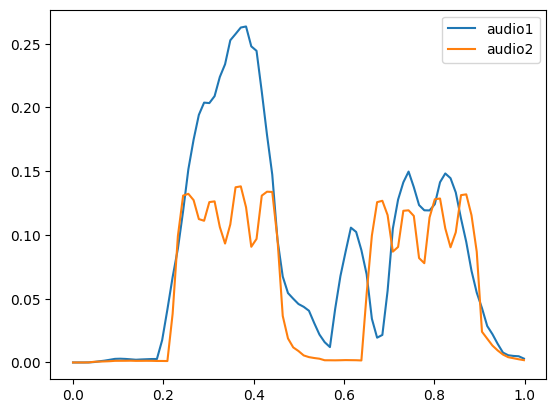

In [30]:
import matplotlib.pyplot as plt

rms2 = librosa.feature.rms(y=audio2)
time2 = librosa.times_like(rms2, sr=sr2)

plt.plot(time1, rms1[0], label='audio1')
plt.plot(time2, rms2[0], label='audio2')

plt.legend()

### ノック77 : 周波数スペクトルを表示してみよう

In [36]:
fft = np.fft.fft(audio1)
n = fft.size

amp = np.abs(fft)

freq = np.fft.fftfreq(n, d=1 / sr1)

display(amp.shape)
display(freq.shape)

display(amp.max())
display(amp.min())

display(freq.max())
display(freq.min())

(44100,)

(44100,)

479.5423236795743

7.932731108988727e-05

22049.0

-22050.0

Text(0, 0.5, 'Amplitube')

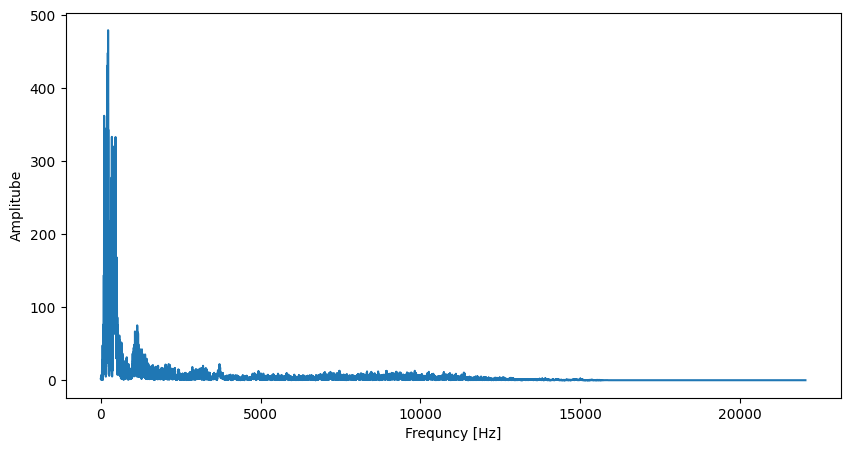

In [37]:
plt.figure(figsize=(10, 5))
plt.plot( freq[:n//2], amp[:n//2])

plt.xlabel('Frequncy [Hz]')
plt.ylabel('Amplitube')

#### 20050Hzデータでの振幅スペクトル

Text(0, 0.5, 'Amplitube')

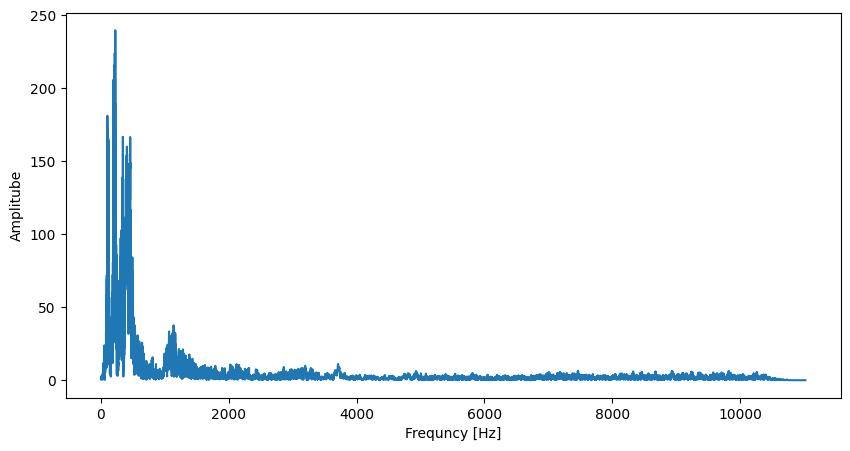

In [39]:
fft = np.fft.fft(audio1_sr22)

n = fft.size

amp = np.abs(fft)
freq = np.fft.fftfreq(n, d=1 / sr1_sr22)

plt.figure(figsize=(10, 5))
plt.plot( freq[:n//2], amp[:n//2])

plt.xlabel('Frequncy [Hz]')
plt.ylabel('Amplitube')

#### 電話の着信音の振幅スペクトル

Text(0, 0.5, 'Amplitube')

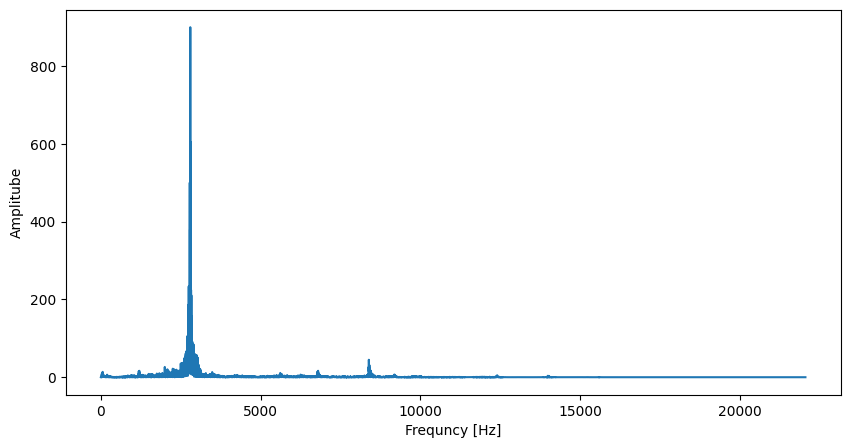

In [40]:
fft = np.fft.fft(audio2)

n = fft.size

amp = np.abs(fft)
freq = np.fft.fftfreq(n, d=1 / sr2)

plt.figure(figsize=(10, 5))
plt.plot( freq[:n//2], amp[:n//2])

plt.xlabel('Frequncy [Hz]')
plt.ylabel('Amplitube')